# Analisi esplorativa dei dati EARS: Un'indagine sui pattern di resistenza batterica in Europa

In [15]:
import pandas as pd

data = pd.read_csv('ecdc.csv')


# Shape: restituisce le dimensioni del DataFrame (righe, colonne)
print("Shape:", data.shape)

# Colonne: restituisce i nomi delle colonne del DataFrame
print("Colonne:", data.columns)

# Info: fornisce un riepilogo delle informazioni sul DataFrame, incluso il tipo di dati per ciascuna colonna
print("Info:")
print(data.info())

# Calcolare il numero di valori nulli in ogni colonna
valori_nulli = data.isnull().sum()

# Stampa il risultato per ogni colonna
print("Numero di valori nulli per ogni colonna:")
print(valori_nulli) 

Shape: (64386, 10)
Colonne: Index(['Unnamed: 0', 'Distribution', 'Unit', 'Time', 'RegionCode',
       'RegionName', 'Category', 'Value', 'Bacteria', 'Antibiotic'],
      dtype='object')
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64386 entries, 0 to 64385
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    64386 non-null  int64  
 1   Distribution  64386 non-null  object 
 2   Unit          64386 non-null  object 
 3   Time          64386 non-null  int64  
 4   RegionCode    64386 non-null  object 
 5   RegionName    64386 non-null  object 
 6   Category      64386 non-null  object 
 7   Value         64386 non-null  float64
 8   Bacteria      64386 non-null  object 
 9   Antibiotic    64386 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 4.9+ MB
None
Numero di valori nulli per ogni colonna:
Unnamed: 0      0
Distribution    0
Unit            0
Time            0
Reg

In [16]:
data.head(5)

,Unnamed: 0,Distribution,Unit,Time,RegionCode,RegionName,Category,Value,Bacteria,Antibiotic
0,0,"R - resistant isolates proportion, by age",%,2012,BG,Bulgaria,0-4,0.000000,Acinetobacter spp.,Aminoglycosides
1,1,"R - resistant isolates proportion, by age",%,2012,BG,Bulgaria,5-18,100.000000,Acinetobacter spp.,Aminoglycosides
2,2,"R - resistant isolates proportion, by age",%,2012,BG,Bulgaria,19-64,62.857143,Acinetobacter spp.,Aminoglycosides
3,3,"R - resistant isolates proportion, by age",%,2012,BG,Bulgaria,65+,56.521739,Acinetobacter spp.,Aminoglycosides
4,4,"R - resistant isolates proportion, by age",%,2012,CY,Cyprus,0-4,33.333333,Acinetobacter spp.,Aminoglycosides


# Data Collection

Dataset scaricato dal database EARS. Ogni voce proviene da un'istituzione di segnalazione nel rispettivo paese europeo. I dati sono stati puliti per creare colonne separate per i batteri e il gruppo di antibiotici. Sono stati rimossi i dati ridondanti o inaffidabili, e sono state apportate altre modifiche per rendere i dati ben formattati e più leggibili.

"Distribution" si riferisce a se i dati sono stati segnalati per un particolare genere o gruppo di età; "RegionName" si riferisce al paese dell'istituzione di segnalazione; "Time" è l'anno; "Category" si riferisce al gruppo di età o al genere (a seconda della distribuzione); "Value" si riferisce alla percentuale di batteri che erano resistenti al gruppo di antibiotici; "Bacteria" si riferisce ai batteri in cui è stata monitorata la resistenza; "Antibiotic" si riferisce al gruppo di antibiotici che è stato utilizzato per uccidere i batteri.

### DESCRIZIONE DELLE COLONNE 

Unnamed: 0: sembra essere un indice aggiunto durante la creazione o il salvataggio del dataframe. Potrebbe non avere un significato utile per l'analisi e potrebbe essere rimosso.

Distribution: si riferisce a se i dati sono stati segnalati per un particolare genere o gruppo di età.

Unit: modalità in percentuale 

Time: questa colonna rappresenta l'anno, che varia da 2000 a 2018.

RegionCode, RegionName: queste colonne rappresentano codici e nomi di regioni.

Category: si riferisce al gruppo di età o al genere (a seconda della distribuzione).

Value: si riferisce alla percentuale di batteri che erano resistenti al gruppo di antibiotici.

Bacteria: rappresenta i batteri in cui è stata monitorata la resistenza.

Antibiotic: si riferisce al gruppo di antibiotici che è stato utilizzato per uccidere i batteri.

### Data Cleaning

Dalla descrizione dei dati forniti, sembra che il DataFrame abbia 64386 righe e 10 colonne. Ogni colonna è indicata dall'indice seguente: ['Unnamed: 0', 'Distribution', 'Unit', 'Time', 'RegionCode', 'RegionName', 'Category', 'Value', 'Bacteria', 'Antibiotic'].

Per quanto riguarda la pulizia dei dati, sembra che non ci siano valori nulli nelle colonne, come indicato dalla riga "Numero di valori nulli per ogni colonna". Tuttavia, ci sono alcune azioni che potresti prendere in considerazione per la pulizia e la preparazione dei dati:

1) Rimozione delle colonne non necessarie: Se la colonna "Unnamed: 0" non fornisce alcuna informazione rilevante, potresti eliminarla dal DataFrame utilizzando il metodo drop di pandas.
2) Gestione dei tipi di dati: Assicurati che i tipi di dati delle colonne siano corretti. Ad esempio, se la colonna "Time" rappresenta l'anno, potresti convertirla in un tipo di dato datetime per una gestione più agevole.
3) Gestione dei valori anomali: Verifica se ci sono valori anomali o outliers nella colonna "Value" e decide come gestirli. Ad esempio, potresti sostituire i valori anomali con NaN o con un valore appropriato, a seconda del contesto.


In [17]:
# Create a copy of the original DataFrame
cleaned_data = data.copy()

#Togliere le colonne non necessarie come "Unnamed:0"
#data = data.drop('Unnamed: 0', axis=1)

#Convertire in datetime colonna "Time"
data['Time'] = pd.to_datetime(data['Time'], format='%Y')

#Presenza di outliers (vedi sotto)

# Calcolare il numero di valori nulli in ogni colonna
valori_nulli = data.isnull().sum()

In [18]:
data.head()

,Unnamed: 0,Distribution,Unit,Time,RegionCode,RegionName,Category,Value,Bacteria,Antibiotic
0,0,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,0-4,0.000000,Acinetobacter spp.,Aminoglycosides
1,1,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,5-18,100.000000,Acinetobacter spp.,Aminoglycosides
2,2,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,19-64,62.857143,Acinetobacter spp.,Aminoglycosides
3,3,"R - resistant isolates proportion, by age",%,2012-01-01,BG,Bulgaria,65+,56.521739,Acinetobacter spp.,Aminoglycosides
4,4,"R - resistant isolates proportion, by age",%,2012-01-01,CY,Cyprus,0-4,33.333333,Acinetobacter spp.,Aminoglycosides


## Data Exploration: analisi preliminare dei dati. 

### Quali sono i batteri e gli antibiotici considerati?

In [19]:
# Ottieni i valori univoci per 'Bacteria'
unique_bacteria = data['Bacteria'].unique()
print("Batteri unici:")
print(unique_bacteria)

# Ottieni i valori univoci per 'Antibiotic'
unique_antibiotics = data['Antibiotic'].unique()
print("Antibiotici unici:")
print(unique_antibiotics)



Batteri unici:
['Acinetobacter spp.' 'Enterococcus faecalis' 'Enterococcus faecium'
 'Escherichia coli' 'Klebsiella pneumoniae' 'Pseudomonas aeruginosa'
 'Staphylococcus aureus' 'Streptococcus pneumoniae']
Antibiotici unici:
['Aminoglycosides' 'Carbapenems'
 'Combined resistance (fluoroquinolones, aminoglycosides and carbapenems)'
 'Fluoroquinolones' 'Aminopenicillins' 'High-level gentamicin'
 'Vancomycin'
 'Combined resistance (third-generation cephalosporin, fluoroquinolones and aminoglycoside)'
 'Third-generation cephalosporins' 'Ceftazidime'
 'Combined resistance (at least three of piperac. and tazob., fluoroq., ceftaz., aminogl. and carbapenems)'
 'PiperacillinTazobactam' 'Meticillin (MRSA)' 'Macrolides' 'Penicillins']


### Quale antibiotico è stato usato per ogni batterio? E' da considerarsi efficiente? 

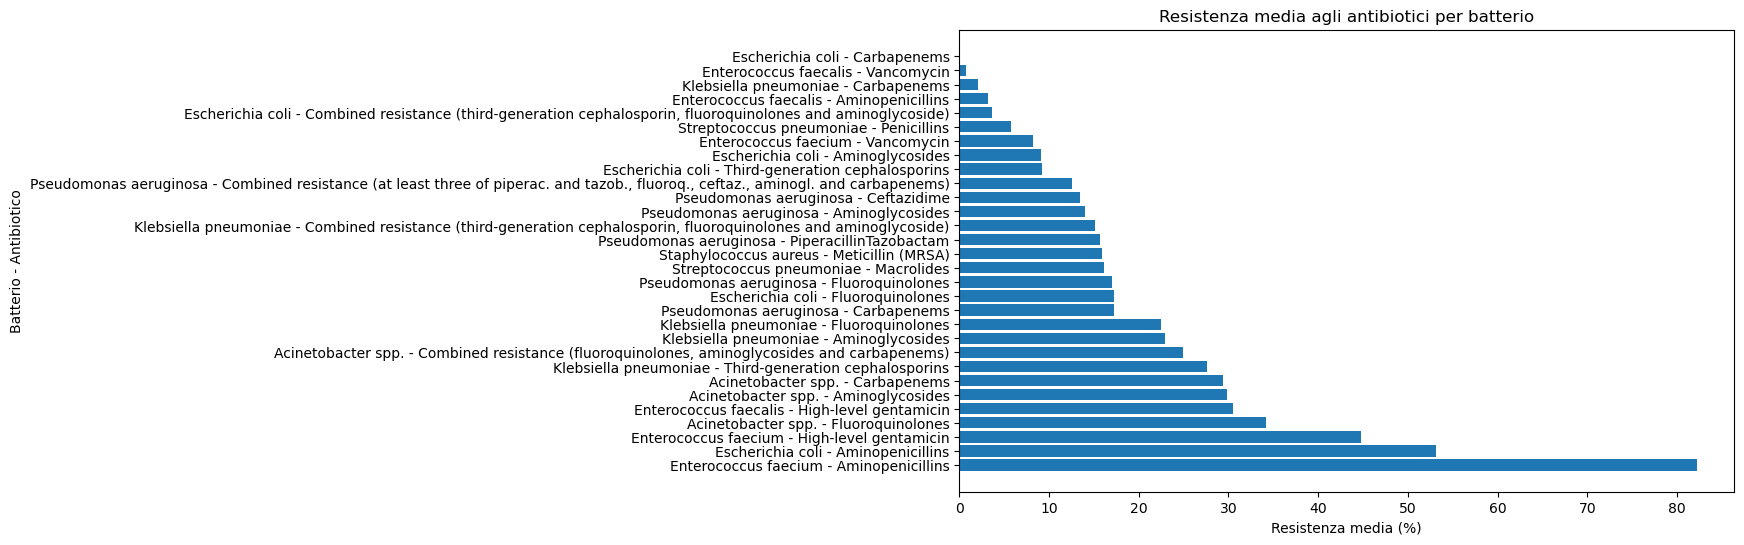

In [20]:
# Raggruppa per 'Bacteria' e 'Antibiotic' e calcola la media di 'Value'
grouped = data.groupby(['Bacteria', 'Antibiotic'])['Value'].mean().reset_index()

# Ordina i risultati in ordine decrescente di 'Value'
grouped = grouped.sort_values('Value', ascending=False)

# Visualizza i risultati con un grafico a barre
plt.figure(figsize=(10, 6))
plt.barh(grouped['Bacteria'] + ' - ' + grouped['Antibiotic'], grouped['Value'])
plt.xlabel('Resistenza media (%)')
plt.ylabel('Batterio - Antibiotico')
plt.title('Resistenza media agli antibiotici per batterio')
plt.show()


In questo codice, barh crea un grafico a barre orizzontale, con l'asse y rappresentante le combinazioni di batterio e antibiotico, e l'asse x rappresentante la resistenza media. Il metodo invert_yaxis() è utilizzato per invertire l'ordine dell'asse y, in modo che le combinazioni con la resistenza media più alta siano in cima.

### Ordinamento in base all'efficienza dell'antibiotico

In questo modo è ancora più evidente quali siano le coppie di batteri-antibiotico più preoccupanti e quali invece al momento possono essere trattati con l'antibiotico corrispondente. 



In [21]:
resistance_grouped_sorted = data.groupby(['Bacteria', 'Antibiotic']).agg({'Value': 'mean'}).reset_index()
resistance_grouped_sorted = resistance_grouped_sorted.rename(columns={'Value': 'mean'})
resistance_grouped_sorted = resistance_grouped_sorted.sort_values(by='mean', ascending=False)

resistance_grouped_sorted


,Bacteria,Antibiotic,mean
7,Enterococcus faecium,Aminopenicillins,82.265742
11,Escherichia coli,Aminopenicillins,53.092757
8,Enterococcus faecium,High-level gentamicin,44.819155
3,Acinetobacter spp.,Fluoroquinolones,34.235005
5,Enterococcus faecalis,High-level gentamicin,30.555649
0,Acinetobacter spp.,Aminoglycosides,29.875082
1,Acinetobacter spp.,Carbapenems,29.343503
20,Klebsiella pneumoniae,Third-generation cephalosporins,27.605112
2,Acinetobacter spp.,"Combined resistance (fluoroquinolones, aminogl...",24.943081
16,Klebsiella pneumoniae,Aminoglycosides,22.906352


### Osservazioni sul comportamento della resistenza

Da questo campione possiamo dedurre che alcuni ceppi di batteri, come "Enterococcus faecium" rispetto agli aminopenicilline, hanno livelli di resistenza molto elevati (in media 82.26%, con una mediana del 88.38%). Ciò indica che l'efficacia delle aminopenicilline contro Enterococcus faecium è generalmente bassa.
Altri ceppi, come "Escherichia coli" rispetto ai carbapenemi, mostrano livelli di resistenza molto bassi (in media 0.11%, con una mediana di 0%). Questo indica che i carbapenemi sono generalmente molto efficaci contro Escherichia coli.
La resistenza varia non solo tra i diversi ceppi di batteri, ma anche tra i diversi antibiotici. Ad esempio, "Acinetobacter spp." ha un livello di resistenza medio più alto alle fluoroquinoloni (34.24%) rispetto ai carbapenemi (29.34%).

### Distribuzione di resistenza per ciascuna coppia di batterio-antibiotico.

In [22]:
resistance_grouped = data.groupby(['Bacteria', 'Antibiotic'])['Value'].agg(['mean','min', 'max', 'median']).reset_index()
resistance_grouped

#min e max sono sempre min = 0 e max = 100
#ad esclusione della coppia Escherichia coli- Aminopenicillins, per i quali il valore minimo di resistenza è 5.882353 e il valore massimo è	90.000000
#mean e mediana 

,Bacteria,Antibiotic,mean,min,max,median
0,Acinetobacter spp.,Aminoglycosides,29.875082,0.000000,100.000000,11.620395
1,Acinetobacter spp.,Carbapenems,29.343503,0.000000,100.000000,8.108108
2,Acinetobacter spp.,"Combined resistance (fluoroquinolones, aminogl...",24.943081,0.000000,100.000000,6.250000
3,Acinetobacter spp.,Fluoroquinolones,34.235005,0.000000,100.000000,15.789474
4,Enterococcus faecalis,Aminopenicillins,3.150801,0.000000,100.000000,0.277778
5,Enterococcus faecalis,High-level gentamicin,30.555649,0.000000,100.000000,31.034483
6,Enterococcus faecalis,Vancomycin,0.703540,0.000000,100.000000,0.000000
7,Enterococcus faecium,Aminopenicillins,82.265742,0.000000,100.000000,88.388348
8,Enterococcus faecium,High-level gentamicin,44.819155,0.000000,100.000000,45.918367
9,Enterococcus faecium,Vancomycin,8.177164,0.000000,100.000000,1.017380


### Media e mediana 

Quando la media e la mediana sono simili, ciò suggerisce generalmente che i dati sono simmetricamente distribuiti intorno al centro. In altre parole, la metà dei dati è inferiore alla mediana (che è anche la media in questo caso) e l'altra metà è superiore. In questa situazione, la media fornisce un buon indicatore del valore "tipico" nei dati, poiché non è eccessivamente influenzata da valori estremamente alti o bassi (outlier).

Quando la media e la mediana sono molto differenti, è probabile che i dati siano asimmetricamente distribuiti. Questo potrebbe suggerire la presenza di valori anomali o estremi che stanno influenzando la media. In questi casi, la mediana può essere un indicatore più affidabile del valore "tipico", poiché è resistente agli outlier. Ad esempio, se la media è molto superiore alla mediana, potrebbe indicare che ci sono alcuni valori molto alti nei dati che stanno alzando la media.

### Considerazioni: 
Nel dataset vediamo per esempio che per "Enterococcus faecium" e "Aminopenicillins" la media e la mediana sono molto vicine (82.26 e 88.39 rispettivamente), indicando una distribuzione probabilmente simmetrica dei dati. Al contrario, per "Acinetobacter spp." e "Aminoglycosides" la media è 29.87 mentre la mediana è solo 11.62, suggerendo una distribuzione asimmetrica con la presenza di valori alti che aumentano la media. Altre coppie di batteri e antibiotici con distribuzione asimmetrica si possono trovare facendo la differenza fra la media e la mediana.

Per trovare il valore discriminante migliore, è possibile eseguire un'analisi esplorativa dei dati calcolando la distribuzione della differenza tra media e mediana e valutando quale valore potrebbe essere un buon criterio di discriminazione.

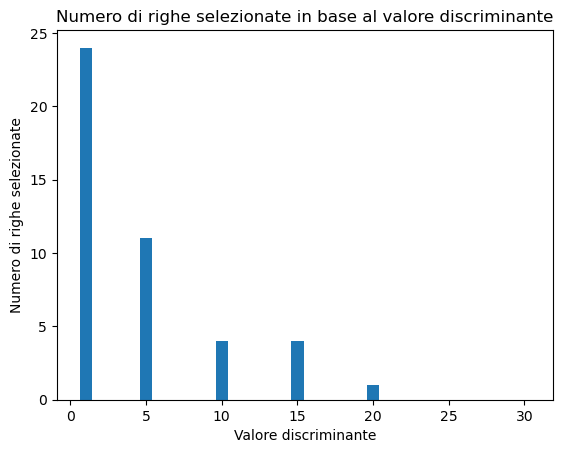

Valore discriminante: 1
Numero di righe selezionate: 24
-----------------------------
Valore discriminante: 5
Numero di righe selezionate: 11
-----------------------------
Valore discriminante: 10
Numero di righe selezionate: 4
-----------------------------
Valore discriminante: 15
Numero di righe selezionate: 4
-----------------------------
Valore discriminante: 20
Numero di righe selezionate: 1
-----------------------------
Valore discriminante: 25
Numero di righe selezionate: 0
-----------------------------
Valore discriminante: 30
Numero di righe selezionate: 0
-----------------------------


In [23]:
# Calcolo della differenza tra media e mediana
resistance_grouped['diff'] = resistance_grouped['mean'] - resistance_grouped['median']

df = resistance_grouped
# Calcolo della differenza tra media e mediana
df['diff'] = df['mean'] - df['median']

# Esplorazione dei dati
thresholds = [1, 5, 10, 15, 20, 25, 30]  # Possibili valori discriminanti da testare

import matplotlib.pyplot as plt

# Dati del grafico
thresholds = [1, 5, 10, 15, 20, 25, 30]
num_rows_selected = [24, 11, 4, 4, 1, 0, 0]

# Creazione del grafico a barre
plt.bar(thresholds, num_rows_selected)
plt.xlabel('Valore discriminante')
plt.ylabel('Numero di righe selezionate')
plt.title('Numero di righe selezionate in base al valore discriminante')
plt.show()

for threshold in thresholds:
    filtered_data = df[df['diff'] > threshold]
    print(f"Valore discriminante: {threshold}")
    print(f"Numero di righe selezionate: {len(filtered_data)}")
    print("-----------------------------")



In [24]:
# Filtraggio dei dati con una grande differenza tra media e mediana
filtered_data = df[df['diff'] > 5] #Consideriamo 5 come valore discriminante  

# Visualizzazione dei risultati
filtered_data


,Bacteria,Antibiotic,mean,min,max,median,diff
0,Acinetobacter spp.,Aminoglycosides,29.875082,0.0,100.0,11.620395,18.254687
1,Acinetobacter spp.,Carbapenems,29.343503,0.0,100.0,8.108108,21.235395
2,Acinetobacter spp.,"Combined resistance (fluoroquinolones, aminogl...",24.943081,0.0,100.0,6.250000,18.693081
3,Acinetobacter spp.,Fluoroquinolones,34.235005,0.0,100.0,15.789474,18.445532
9,Enterococcus faecium,Vancomycin,8.177164,0.0,100.0,1.017380,7.159783
16,Klebsiella pneumoniae,Aminoglycosides,22.906352,0.0,100.0,15.384615,7.521737
18,Klebsiella pneumoniae,Combined resistance (third-generation cephalos...,15.129822,0.0,100.0,7.692308,7.437515
19,Klebsiella pneumoniae,Fluoroquinolones,22.469715,0.0,100.0,16.666667,5.803048
20,Klebsiella pneumoniae,Third-generation cephalosporins,27.605112,0.0,100.0,20.754717,6.850395
21,Pseudomonas aeruginosa,Aminoglycosides,14.055847,0.0,100.0,9.009009,5.046838


### Presenza di outliers?
Motivi di distribuzioni di frequenza asimetriche sono: 


Asimmetria della distribuzione: Se la distribuzione dei dati è asimmetrica, con una coda lunga su un lato, la media può essere influenzata da questi valori estremi, mentre la mediana sarà meno influenzata. Questo può portare a una differenza maggiore tra media e mediana.

Presenza di valori estremi: La presenza di valori molto alti o molto bassi all'interno del campione può influenzare la media, portandola ad allontanarsi dalla mediana. Questi batteri potrebbero avere valori estremi che contribuiscono a una differenza significativa tra media e mediana.

Effetto di outlier: La presenza di valori anomali o outlier all'interno del campione può influenzare notevolmente la media, spingendola lontano dalla mediana. Questi batteri potrebbero presentare alcuni outlier che contribuiscono alla differenza osservata.

### Calcolare l'asimmetria (skewness) dei dati per ogni coppia di batterio e antibiotico.

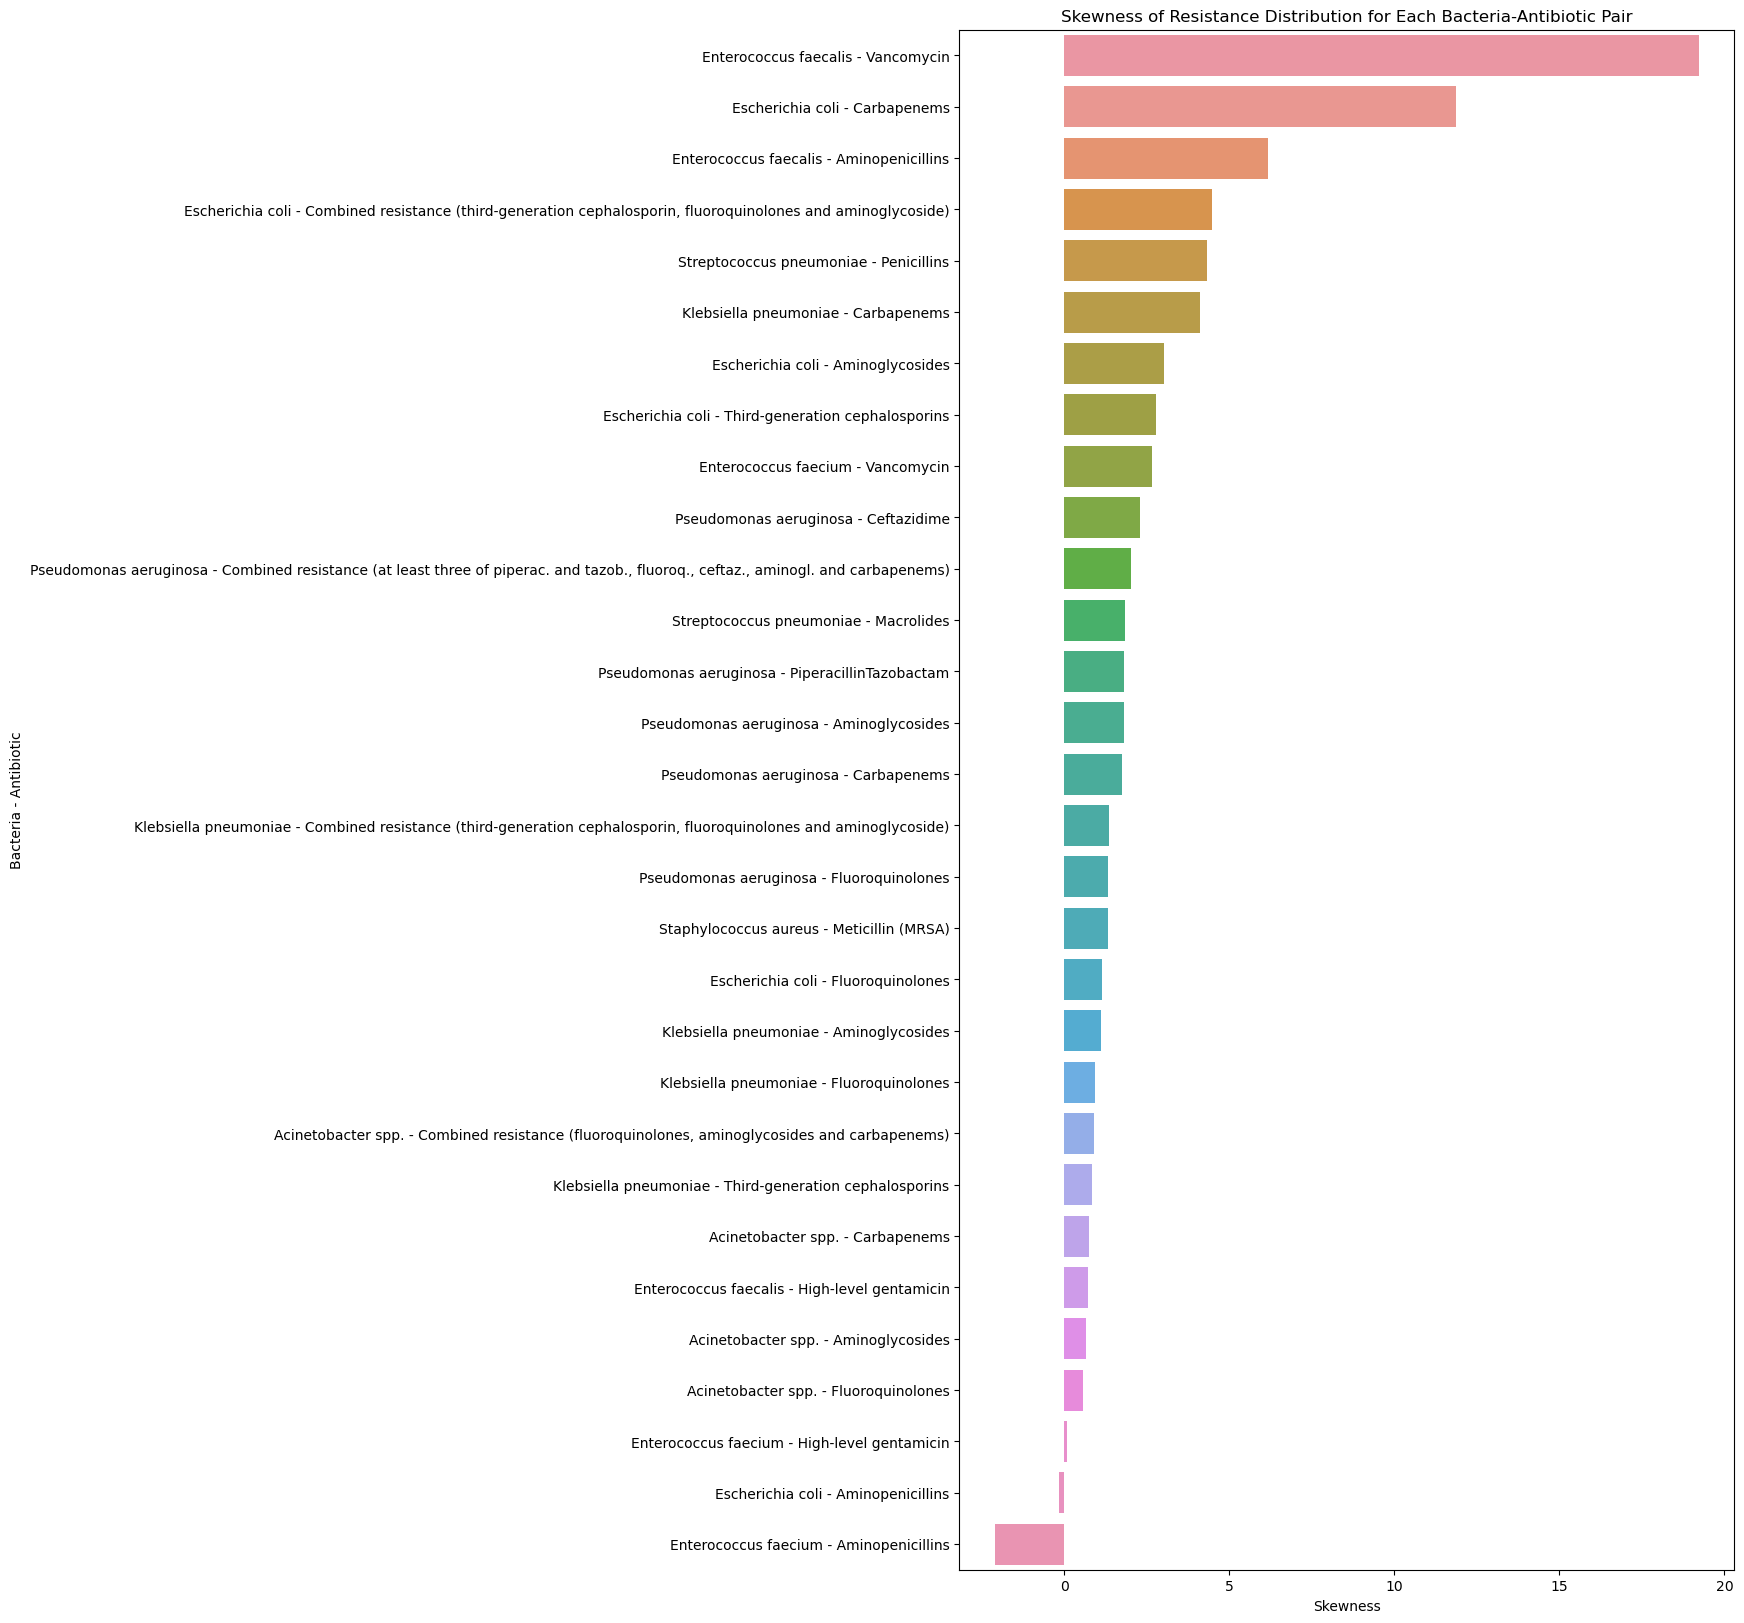

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supponendo che 'values' sia una colonna nel DataFrame che rappresenta la distribuzione completa dei dati
data.groupby(['Bacteria', 'Antibiotic'])['Value'].apply(lambda x: x.skew())

# Calcolo della skewness per ogni coppia di batterio e antibiotico
skewness = data.groupby(['Bacteria', 'Antibiotic'])['Value'].apply(lambda x: x.skew()).reset_index()

# Creazione di una nuova colonna per facilitare la visualizzazione
skewness['Bacteria_Antibiotic'] = skewness['Bacteria'] + " - " + skewness['Antibiotic']

# Ordinamento dei dati in base al valore della skewness
skewness = skewness.sort_values(by='Value', ascending=False)

plt.figure(figsize=(10,20))

# Creazione del grafico a barre
sns.barplot(data=skewness, y='Bacteria_Antibiotic', x='Value')

plt.xlabel('Skewness')
plt.ylabel('Bacteria - Antibiotic')
plt.title('Skewness of Resistance Distribution for Each Bacteria-Antibiotic Pair')

plt.show()


#### Skewness
Le asimmetrie rappresentano il grado di asimmetria della distribuzione di resistenza di ogni batterio ad un particolare antibiotico.

L'asimmetria è una misura che descrive la forma di una distribuzione di probabilità. Un valore di asimmetria di 0 indica una distribuzione simmetrica. Un valore positivo indica una distribuzione con una coda più lunga a destra (positiva), mentre un valore negativo indica una distribuzione con una coda più lunga a sinistra (negativa).

#### Osservazioni 

La maggior parte dei batteri ha una asimmetria positiva per la resistenza agli antibiotici, il che significa che la coda della distribuzione è più lunga sulla destra. Questo suggerisce che ci sono alcuni batteri con una resistenza molto alta agli antibiotici che influenzano la forma della distribuzione.

Alcuni batteri, come Enterococcus faecium con Aminopenicillins e Escherichia coli con Aminopenicillins, mostrano asimmetria negativa. Questo significa che ci sono alcuni batteri con una resistenza molto bassa agli antibiotici che spingono la distribuzione ad essere più lunga a sinistra.

Alcuni batteri mostrano un'asimmetria estremamente alta, come Enterococcus faecalis con Vancomycin (19.23) e Escherichia coli con Carbapenems (11.85), suggerendo una distribuzione molto asimmetrica con una coda lunga a destra.

Al contrario, Enterococcus faecium con Aminopenicillins mostra un'asimmetria estremamente negativa (-2.11), suggerendo una distribuzione molto asimmetrica con una coda lunga a sinistra.

#### Considerazioni 

Queste osservazioni indicano che la resistenza agli antibiotici non è distribuita uniformemente tra i batteri e può variare notevolmente. Alcuni batteri possono avere una resistenza molto alta o molto bassa rispetto alla media, creando distribuzioni asimmetriche. 

Questo può avere implicazioni importanti per il trattamento delle infezioni batteriche, poiché può essere necessario considerare la variazione nella resistenza degli antibiotici quando si sceglie un trattamento.





### Ci sono valori estremi?

KeyError: 'Value'

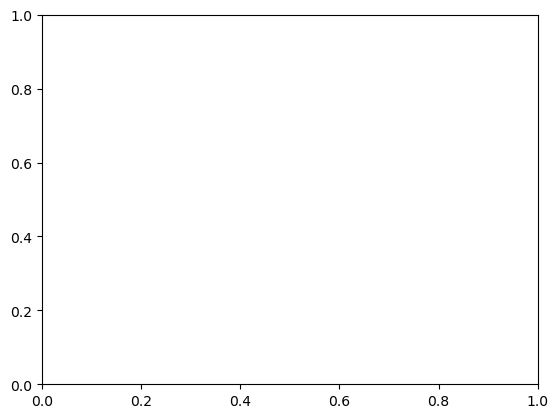

In [39]:
import matplotlib.pyplot as plt

# Iterate over each unique combination of bacteria and antibiotic
for bacteria, antibiotic in df[['Bacteria', 'Antibiotic']].drop_duplicates().values:
    # Filter the data for the current bacteria and antibiotic combination
    filtered_data = df[(df['Bacteria'] == bacteria) & (df['Antibiotic'] == antibiotic)]
    
    # Create a new figure and axis for the plot
    fig, ax = plt.subplots()
    
    # Plot the 'Value' column
    ax.plot(filtered_data.index, filtered_data['Value'], marker='o', linestyle='-', color='blue')
    
    # Set the x-axis and y-axis labels
    ax.set_xlabel('Data Point')
    ax.set_ylabel('Value')
    
    # Set the title using the bacteria and antibiotic names
    ax.set_title(f'Bacteria: {bacteria}\nAntibiotic: {antibiotic}')
    
    # Display the plot
    plt.show()



## ANALISI GRAFICA


Histogram (histplot): Potresti utilizzare un istogramma per visualizzare la distribuzione dei valori di resistenza agli antibiotici ('Value'). Questo ti permetterebbe di vedere in che modo i valori si distribuiscono lungo il range di percentuali.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea l'istogramma
sns.histplot(data['Value'], bins=10, kde=True)

# Personalizza l'istogramma
plt.title('Distribuzione dei valori di resistenza')
plt.xlabel('Valore di resistenza')
plt.ylabel('Frequenza')

# Mostra l'istogramma
plt.show()


Box Plot (boxplot): Un box plot potrebbe essere utilizzato per confrontare la distribuzione dei valori di resistenza tra diverse categorie di batteri ('Bacteria') o tra diversi gruppi di antibiotici ('Antibiotic'). Potrebbe anche essere interessante confrontare le distribuzioni per differenti anni ('Time') o regioni ('RegionName').

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un box plot per la distribuzione dei valori di resistenza tra diverse categorie di batteri
sns.boxplot(x='Bacteria', y='Value', data=data)
plt.xticks(rotation=90)  # Ruota le etichette sull'asse x, se necessario
plt.title('Distribuzione dei valori di resistenza per categorie di batteri')
plt.xlabel('Batteri')
plt.ylabel('Valore di resistenza')

# Mostra il box plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supponendo che il tuo DataFrame si chiami df

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Value', data=df)

plt.title('Distribuzione dei valori per ogni categoria')
plt.xlabel('Categoria')
plt.ylabel('Valore')
plt.show()


Bar Plot (barplot): Un bar plot potrebbe essere utile per confrontare la resistenza media (o mediana, o altro indice di centralità) tra diverse categorie di batteri o gruppi di antibiotici. Potresti anche usare un bar plot per visualizzare il numero di rapporti per anno, per regione, ecc.

Confronto tra categorie di batteri o gruppi di antibiotici:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la resistenza media per ogni categoria di batteri o gruppo di antibiotici
resistance_mean = data.groupby('Bacteria')['Value'].mean()  # Sostituisci 'Bacteria' con 'Antibiotic' se necessario

# Crea un bar plot per la resistenza media
sns.barplot(x=resistance_mean.index, y=resistance_mean.values)
plt.xticks(rotation=90)  # Ruota le etichette sull'asse x, se necessario
plt.title('Resistenza media tra categorie di batteri')  # Sostituisci con 'Resistenza media tra gruppi di antibiotici' se necessario
plt.xlabel('Categorie di batteri')  # Sostituisci con 'Gruppi di antibiotici' se necessario
plt.ylabel('Resistenza media')

# Mostra il bar plot
plt.show()


Visualizzazione del numero di rapporti per anno, regione, ecc.:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conta il numero di rapporti per ogni anno, regione, ecc.
reports_count = data['Time'].value_counts()  # Sostituisci 'Time' con 'RegionName' o qualsiasi altra colonna di interesse

# Crea un bar plot per il numero di rapporti
sns.barplot(x=reports_count.index, y=reports_count.values)
plt.xticks(rotation=90)  # Ruota le etichette sull'asse x, se necessario
plt.title('Numero di rapporti per anno')  # Sostituisci con 'Numero di rapporti per regione' o altro titolo rilevante
plt.xlabel('Anno')  # Sostituisci con 'Regione' o altro asse x rilevante
plt.ylabel('Numero di rapporti')

# Mostra il bar plot
plt.show()


Relational Plot (relplot): Questo è un tipo di plot multiplo che può creare una griglia di sotto-grafici per esplorare la relazione tra tre variabili. Potrebbe essere utile, ad esempio, per confrontare le tendenze nei valori di resistenza nel tempo per diversi gruppi di antibiotici o categorie di batteri. Un'altra possibilità potrebbe essere quella di confrontare le tendenze in diverse regioni.

Confronto delle tendenze nel tempo per diversi gruppi di antibiotici:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un relplot per confrontare le tendenze nel tempo per diversi gruppi di antibiotici
sns.relplot(x='Time', y='Value', hue='Antibiotic', data=data, kind='line', aspect=2)
plt.title('Tendenze nei valori di resistenza nel tempo per gruppi di antibiotici')
plt.xlabel('Anno')
plt.ylabel('Valore di resistenza')

# Mostra il relplot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un grafico faccetta per confrontare le tendenze in diverse regioni
g = sns.relplot(x='Time', y='Value', hue='RegionName', col='RegionName', col_wrap=4, kind='line', data=data)
g.set_titles('{col_name}')
g.set_axis_labels('Anno', 'Valore di resistenza')
plt.tight_layout()

# Sposta la legenda nella parte inferiore del riquadro
g.fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)  # Posiziona la legenda nella parte inferiore del riquadro

# Mostra i grafici faccetta con la legenda in basso
plt.show()



Confronto delle tendenze in diverse regioni:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un relplot per confrontare le tendenze in diverse regioni
sns.relplot(x='Time', y='Value', hue='RegionName', data=data, kind='line', aspect=2)
plt.title('Tendenze nei valori di resistenza nel tempo per diverse regioni')
plt.xlabel('Anno')
plt.ylabel('Valore di resistenza')

# Mostra il relplot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un grafico faccetta per confrontare le tendenze in diverse regioni
g = sns.relplot(x='Time', y='Value', hue='RegionName', col='RegionName', col_wrap=4, kind='line', data=data)
g.set_titles('{col_name}')
g.set_axis_labels('Anno', 'Valore di resistenza')
plt.tight_layout()

# Mostra i grafici faccetta
plt.show()


Heatmap: Puoi utilizzare un Heatmap per visualizzare la correlazione tra le variabili numeriche nel tuo dataframe. Ad esempio, potresti essere interessato a conoscere la correlazione tra 'Value' (percentuale di resistenza) e altre variabili come 'Time' (anno). Puoi creare un Heatmap utilizzando la libreria seaborn in questo modo:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleziona le colonne numeriche di interesse
numeric_columns = ['Value', 'Time']

# Crea una matrice di correlazione tra le colonne numeriche
correlation_matrix = data[numeric_columns].corr()

# Crea il Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostra il plot
plt.show()


Pair Plot: Un Pair Plot può essere utile per esplorare le relazioni tra le variabili numeriche nel tuo dataframe. Puoi utilizzarlo per visualizzare i diagrammi di dispersione tra coppie di variabili e le distribuzioni marginali delle singole variabili. Puoi creare un Pair Plot utilizzando seaborn in questo modo:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleziona le colonne numeriche di interesse
numeric_columns = ['Value', 'Time']

# Crea il Pair Plot
sns.pairplot(data[numeric_columns])

# Mostra il plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supponendo che il tuo DataFrame si chiami df

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Value', data=data)

plt.title('Distribuzione dei valori per ogni categoria')
plt.xlabel('Categoria')
plt.ylabel('Valore')
plt.show()


Questo codice crea un box plot per ogni categoria ('0-4', '5-18', '19-64', '65+'), mostrando la distribuzione dei 'Value' per ciascuna categoria. Ogni box plot mostra la mediana (la linea nera all'interno della scatola), i quartili (le estremità della scatola), e gli outlier (i punti al di fuori delle "antenne").

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Value', data=data, ci=None)

plt.title('Media dei valori per ogni categoria')
plt.xlabel('Categoria')
plt.ylabel('Valore')
plt.show()


Questo codice crea un grafico a barre con l'asse x rappresentante la 'Category' e l'asse y rappresentante la media dei 'Value' per ciascuna categoria. Il parametro ci=None rimuove le barre di errore (che rappresentano l'intervallo di confidenza).

In [ ]:
# Esegui un'operazione groupby sulla base della 'Category' e calcola la media dei 'Value'
grouped = data.groupby('Category')['Value'].mean()

print(grouped)


In [ ]:
grouped.plot(kind='bar', figsize=(10, 6))

plt.title('Media dei valori per ogni categoria')
plt.xlabel('Categoria')
plt.ylabel('Media del valore')
plt.show()


Questo codice crea un grafico a barre con l'asse x rappresentante la 'Category' e l'asse y rappresentante la media dei 'Value' per ciascuna categoria. Ogni barra rappresenta una categoria e l'altezza della barra rappresenta la media dei 'Value' per quella categoria.

Per determinare le correlazioni tra le colonne del tuo DataFrame, puoi utilizzare il metodo .corr() di pandas. Tuttavia, il metodo .corr() funziona solo su colonne numeriche.

Nel tuo DataFrame, le colonne numeriche sono Unnamed: 0, Time e Value. Puoi quindi utilizzare il metodo .corr() su queste colonne nel seguente modo:

In [ ]:
# Calcola la correlazione tra le colonne numeriche
correlation = data[['Unnamed: 0', 'Time', 'Value']].corr()

print(correlation)


Questo codice restituirà un DataFrame che mostra le correlazioni tra le colonne Unnamed: 0, Time e Value.

Ricorda che il coefficiente di correlazione varia tra -1 e 1. Un valore vicino a 1 implica una forte correlazione positiva, un valore vicino a -1 una forte correlazione negativa, e un valore vicino a 0 nessuna correlazione.

Nel tuo caso specifico, tieni presente che il coefficiente di correlazione da solo potrebbe non essere sufficiente per trarre conclusioni definitive. Ad esempio, la colonna Unnamed: 0 sembra essere solo un indice ed è improbabile che abbia un significato utile. Potrebbe essere utile eseguire ulteriori analisi statistiche per comprendere meglio i tuoi dati.